In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from grades import load_grades, ta_stats, to_pandas

grades, rubric, questions = load_grades("rubrics/dw2.json", "data/dw2")
grades_df = to_pandas(grades)

Loaded question: 4_Fogg_Creating_pers data/dw2/4_Fogg_Creating_persuasive_technologies_A.csv
Loaded question: 1_Fogg_Persuasive_co data/dw2/1_Fogg_Persuasive_computers_perspectives_.csv
Loaded question: 7_Correll_Ethical_de data/dw2/7_Correll_Ethical_demensions_of_visualiza.csv
Loaded question: 14_Williams_An_anxio data/dw2/14_Williams_An_anxious_alliance.csv
Loaded question: 5_Cairo_Emotional_da data/dw2/5_Cairo_Emotional_data_visualization.csv
Loaded question: 2_Consolvo_et_al_Des data/dw2/2_Consolvo_et_al_Designing_for_behavior_c.csv
Loaded question: 6_Knaflic_Accessible data/dw2/6_Knaflic_Accessible_data_viz_is_better_d.csv
Loaded question: 15_Liboiron_How_the_ data/dw2/15_Liboiron_How_the_ocean_cleanup_array_f.csv
Loaded question: 8_Bloch_Principle_ma data/dw2/8_Bloch_Principle_make_the_invisible_visi.csv
Loaded question: 16_Liboiron_Against_ data/dw2/16_Liboiron_Against_awareness_for_scale_g.csv
Loaded question: 12_Kosminsky_et_al_B data/dw2/12_Kosminsky_et_al_Belief_at_first_sig

In [2]:
# Print loaded grades
grades_df

# Grader score violin plot

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


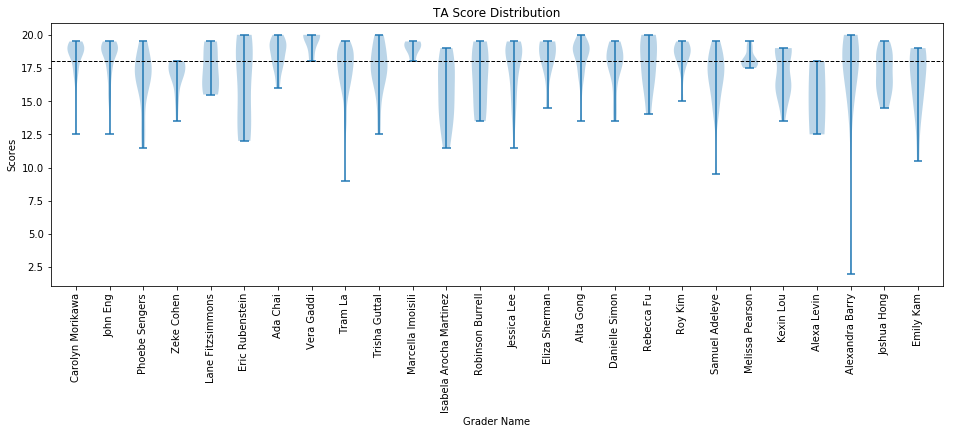

In [30]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Grader Name')

# create test data
graders_scores = ta_stats(grades)
data = np.array([np.array(sorted(s)) for _, s in graders_scores.items()])
total_mean = np.median(np.hstack(data))

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharey=True)

ax1.set_title('TA Score Distribution')
ax1.set_ylabel('Scores')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax1.violinplot(data)

plt.axhline(y=total_mean, color='k', linestyle='dashed', linewidth=1)

# set style for the axes
labels = [g for g, _ in graders_scores.items()]
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

# Average Scores Given per Grader

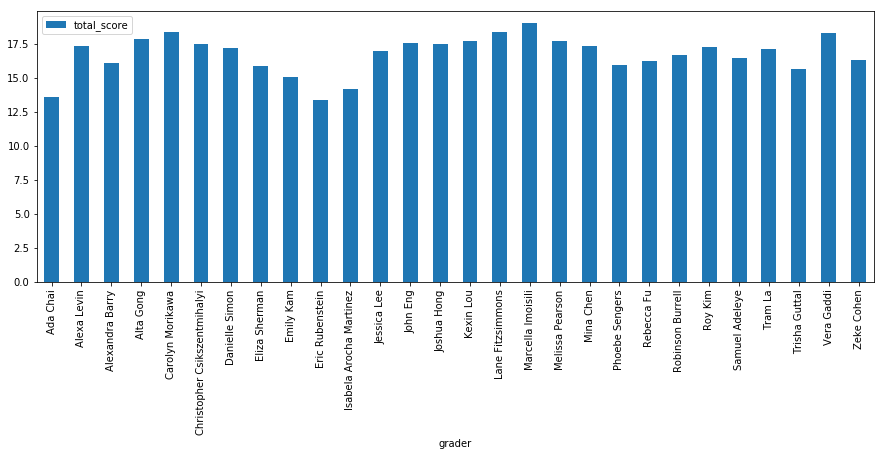

In [43]:
grades_df.groupby('grader').mean()[['total_score']].plot.bar(figsize=(15,5), rot=90)

# Average Scores per Question

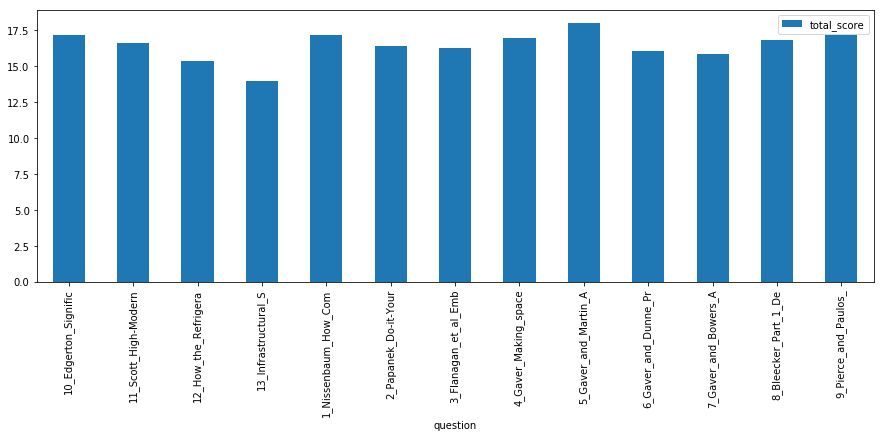

In [44]:
grades_df.groupby('question').mean()[['total_score']].plot.bar(figsize=(15,5), rot=90)

# Distribution of Final Scores

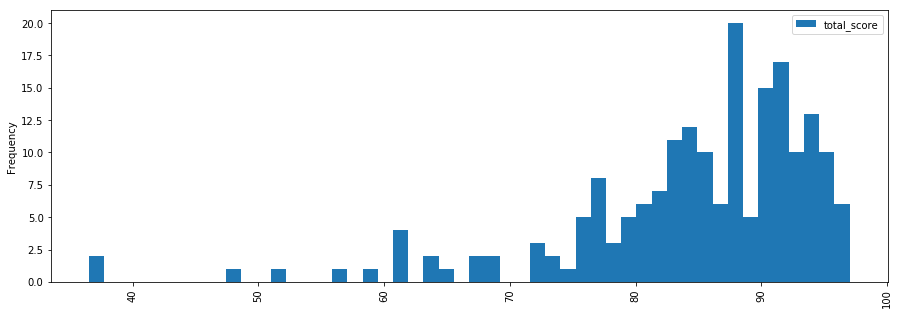

In [45]:
# Plot distribution of final scores
grades_df.groupby('sid').sum()[['total_score']].plot.hist(figsize=(15,5), rot=90, bins=50)

## Letter Grade Distribution

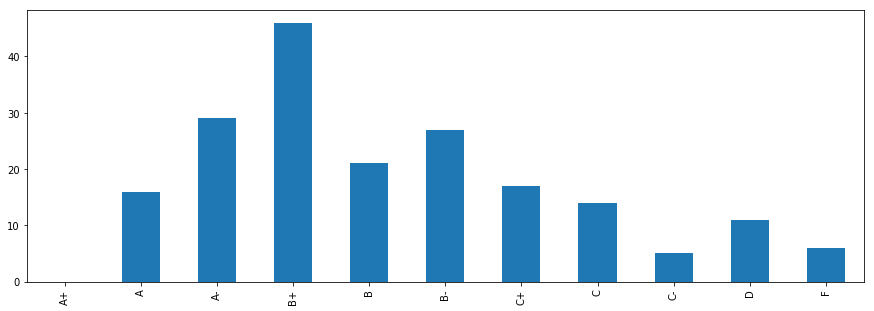

In [46]:
# Edit the highest score per assignment
max_score = rubric['maxScore']
grades = {
    98: "A+",
    95: "A",
    92: "A-",
    88: "B+",
    85: "B",
    82: "B-",
    78: "C+",
    75: "C",
    72: "C-",
    60: "D",
    0: "F"
}

def grade_mapping(value):
    perc = 100 * value / max_score
    for key, letter in grades.items():
        if perc >= key:
            return letter
        
letter_grades = grades_df.groupby('sid').sum()['total_score'].map(grade_mapping)
# final_data["Final Grade"] = pd.Categorical(
#     letter_grades, categories=grades.values(), ordered=True
# )
letters = list(grades.values())
letter_grades.value_counts()[letters].plot(kind='bar', figsize=(15,5))